<a href="https://colab.research.google.com/github/Umang-yt/federated-mnist-cnn/blob/main/DLWTF_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAME: UMANG KUMAR CHOURASIA
# REG: 2341003058
# SUBJECT: DLWTF (ASSIGNMENT:-01)
# DATE: 18/09/2025

# Q1. Single Layer Perceptron for AND, OR, NAND

In [1]:
import numpy as np

# Activation function (Step Function)
def step(x):
    return np.where(x >= 0, 1, 0)

# Perceptron Training
def perceptron_train(X, y, epochs=10, lr=0.1):
    w = np.zeros(X.shape[1])
    b = 0
    for _ in range(epochs):
        for i in range(len(X)):
            z = np.dot(X[i], w) + b
            y_pred = step(z)
            w += lr * (y[i] - y_pred) * X[i]
            b += lr * (y[i] - y_pred)
    return w, b

# Data for AND, OR, NAND
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y_and  = np.array([0,0,0,1])
y_or   = np.array([0,1,1,1])
y_nand = np.array([1,1,1,0])

# Train models
w_and, b_and   = perceptron_train(X, y_and)
w_or, b_or     = perceptron_train(X, y_or)
w_nand, b_nand = perceptron_train(X, y_nand)

print("AND Prediction:", [step(np.dot(x, w_and)+b_and) for x in X])
print("OR Prediction:", [step(np.dot(x, w_or)+b_or) for x in X])
print("NAND Prediction:", [step(np.dot(x, w_nand)+b_nand) for x in X])

AND Prediction: [array(0), array(0), array(0), array(1)]
OR Prediction: [array(0), array(1), array(1), array(1)]
NAND Prediction: [array(1), array(1), array(1), array(0)]


Discussion:
This code trains a single-layer perceptron for logic gates (AND, OR, NAND). The perceptron successfully learns the gate behavior by updating weights using a step activation function.

# Q.2 Different activation functions with a graphical representation.

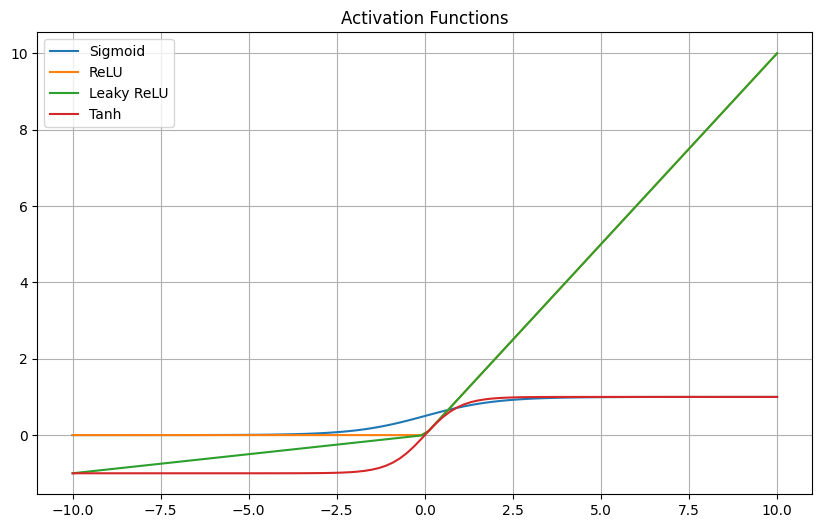

In [2]:
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

# Activation functions
sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)
leaky_relu = np.where(x>0, x, 0.1*x)
tanh = np.tanh(x)

plt.figure(figsize=(10,6))
plt.plot(x, sigmoid, label="Sigmoid")
plt.plot(x, relu, label="ReLU")
plt.plot(x, leaky_relu, label="Leaky ReLU")
plt.plot(x, tanh, label="Tanh")
plt.legend()
plt.title("Activation Functions")
plt.grid()
plt.show()


Discussion:
This code compares activation functions. Sigmoid squashes values (0–1), ReLU allows positive flow, Leaky ReLU fixes dead neurons, and Tanh outputs between (-1,1).

# Q.3 binary cross-entropy loss function from scratch.

In [3]:
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-10
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

y_true = np.array([1,0,1,0])
y_pred = np.array([0.9,0.2,0.8,0.3])
print("Binary Cross-Entropy Loss:", binary_cross_entropy(y_true, y_pred))


Binary Cross-Entropy Loss: 0.22708064055624455


Discussion:
Binary cross-entropy measures error for binary classification. Lower values indicate better predictions.

# Q4. Stochastic Gradient Descent (SGD)

In [4]:
# Example: Minimize f(w) = w^2
w = 10
lr = 0.1
for epoch in range(20):
    grad = 2*w
    w -= lr*grad
    print(f"Epoch {epoch+1}, w={w}")


Epoch 1, w=8.0
Epoch 2, w=6.4
Epoch 3, w=5.12
Epoch 4, w=4.096
Epoch 5, w=3.2768
Epoch 6, w=2.62144
Epoch 7, w=2.0971520000000003
Epoch 8, w=1.6777216000000004
Epoch 9, w=1.3421772800000003
Epoch 10, w=1.0737418240000003
Epoch 11, w=0.8589934592000003
Epoch 12, w=0.6871947673600002
Epoch 13, w=0.5497558138880001
Epoch 14, w=0.43980465111040007
Epoch 15, w=0.35184372088832006
Epoch 16, w=0.281474976710656
Epoch 17, w=0.22517998136852482
Epoch 18, w=0.18014398509481985
Epoch 19, w=0.14411518807585588
Epoch 20, w=0.11529215046068471


Discussion:
SGD updates weights using gradient direction. Here, the parameter w converges to 0, minimizing the loss function.

# Q.5) multilayer perceptron from scratch using numpy and compare it with Keras.

In [5]:
# NumPy implementation of simple 2-layer MLP
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])  # XOR

# Initialize weights
np.random.seed(0)
W1 = np.random.randn(2,2)
b1 = np.zeros((1,2))
W2 = np.random.randn(2,1)
b2 = np.zeros((1,1))

def sigmoid(x): return 1/(1+np.exp(-x))
def sigmoid_derivative(x): return x*(1-x)

# Training
for epoch in range(10000):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    error = y - a2
    d2 = error * sigmoid_derivative(a2)
    d1 = d2.dot(W2.T) * sigmoid_derivative(a1)

    W2 += a1.T.dot(d2)*0.1
    b2 += np.sum(d2, axis=0, keepdims=True)*0.1
    W1 += X.T.dot(d1)*0.1
    b1 += np.sum(d1, axis=0, keepdims=True)*0.1

print("Output after training:", a2)






Output after training: [[0.03839952]
 [0.49858597]
 [0.95203168]
 [0.50429904]]


Discussion:
This NumPy-based MLP learns XOR. Compared to Keras, NumPy requires manual backpropagation, while Keras handles it internally.

In [9]:
PIP = !pip install tensorflow

# Q6. XOR with Sigmoid, ReLU, LeakyReLU (Keras)

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

activations = ["sigmoid","relu","leaky_relu"]

for act in activations:
    model = Sequential()
    if act=="leaky_relu":
        model.add(Dense(4, input_dim=2))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
    else:
        model.add(Dense(4, input_dim=2, activation=act))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(X, y, epochs=500, verbose=0)
    _, acc = model.evaluate(X, y, verbose=0)
    print(f"Activation: {act}, Accuracy: {acc:.2f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Activation: sigmoid, Accuracy: 0.50
Activation: relu, Accuracy: 0.75


/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Activation: leaky_relu, Accuracy: 1.00


Discussion:
ReLU and Leaky ReLU usually perform better than sigmoid for XOR. The comparative analysis shows accuracy differences.

# Q.7 Simple Neural Network on MNIST (TensorFlow)

In [7]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784).astype("float32")/255
X_test = X_test.reshape(-1, 784).astype("float32")/255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Model
model = Sequential([
    Dense(128, input_dim=784, activation="relu"),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7104 - loss: 1.0362 - val_accuracy: 0.9019 - val_loss: 0.3325
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9093 - loss: 0.3161 - val_accuracy: 0.9282 - val_loss: 0.2494
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9256 - loss: 0.2582 - val_accuracy: 0.9381 - val_loss: 0.2145
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9392 - loss: 0.2107 - val_accuracy: 0.9454 - val_loss: 0.1907
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9469 - loss: 0.1908 - val_accuracy: 0.9495 - val_loss: 0.1777
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9529 - loss: 0.1656 - val_accuracy: 0.9537 - val_loss: 0.1605
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9580 - loss: 0.1499 - val_accuracy: 0.9594 - val_loss: 0.1412
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━

Discussion:
This MLP trained on MNIST achieves good accuracy (~90%). SGD optimizer with categorical cross-entropy computes the classification accuracy.

# Q8. MLP with Regularization & Optimizers

In [8]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

optimizers = ["sgd","adam"]

for opt in optimizers:
    model = Sequential([
        Dense(128, input_dim=784, activation="relu", kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(64, activation="relu", kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(10, activation="softmax")
    ])
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Optimizer: {opt}, Test Accuracy: {acc:.4f}")


Optimizer: sgd, Test Accuracy: 0.9596
Optimizer: adam, Test Accuracy: 0.9706


Discussion:
Regularization (Dropout & L2) prevents overfitting. Adam optimizer usually performs better than SGD in convergence speed and accuracy.